<a href="https://colab.research.google.com/github/mattstruhs/ml-knnClassifier/blob/master/KNNClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 

# KNN Classifier
Building a KNN Classifier using NumPy

In [123]:
class KNNClassifier():

  def __init__(self,k): 
    # attributes
    # k = number of neighbors
    self.k = k

  # Methods: operations or actions 
  # data = X where “X” is a matrix that each row is a sample, and the columns are the features (shape = [num of samples,num of features])
  # labels = y where “y” is a vector with the corresponding class numbers (shape = [num of samples, ])
  def fit(self, X,y):
    # print("X is {} and y is {}".format(X, y))
    self.X=X
    self.y=y
    print("training data loaded")


  # X_new = input samples in a matrix (X) 
  # returns the predicted classes in a vector and “X” shape is similar to the “X” in “fit” method
  def predict(self, X_new):

    results = []
    for i in range(X_new.shape[0]):
    # for i in range(5):

      # get nearest neighbors from training data
      sample = X_new[i,:]
      sq_distances = np.sum((self.X-sample)**2, axis=1) # calculate the Eucleadian distance, used broadcasting
      k_nearest = np.argsort(sq_distances)[:self.k] # sort and get the top k nearest (lowest distance)

      # get labels from nearest neighbors and find highest frequency
      classification = []
      for j in range(self.k):
        classification.append(self.y[k_nearest[j]]) # get training labels from nearest neighbors
      # print("classifications",classification)
      unique_labels, counts_labels = np.unique(classification, return_counts=True) # count unique training labels
      # print("unique labels",unique_labels, counts_labels)
      maxFrequency = counts_labels.max() # get max frequency of training labels
      maxFrequencyIndex = np.where(maxFrequency) # get index of max frequency
      # print("index of max frequency",maxFrequencyIndex)
      prediction = unique_labels[maxFrequencyIndex] # use index from max frequency to get label
      # print("prediction", prediction[0])
      # print("data type of prediction",type(prediction[0]))

      # store predictions in list
      results.append(prediction[0])
    return results


    # obs = []
    # for i in range(k_nearest):
      # obs.append(trainingResponse[k_nearest[i]])
    #   print(obs)
    #   print("Frequency of unique values of the said array:")
    #   print(np.asarray((unique_elements, counts_elements)))
  
    #   print("index of highest frequency", unique_elements[maxFrequency])



# Load Data

In [3]:
data = np.loadtxt('/content/drive/MyDrive/ML-Data/mnist.csv', delimiter=',')

In [4]:
print(data.size)
print(data.shape)

47100000
(60000, 785)


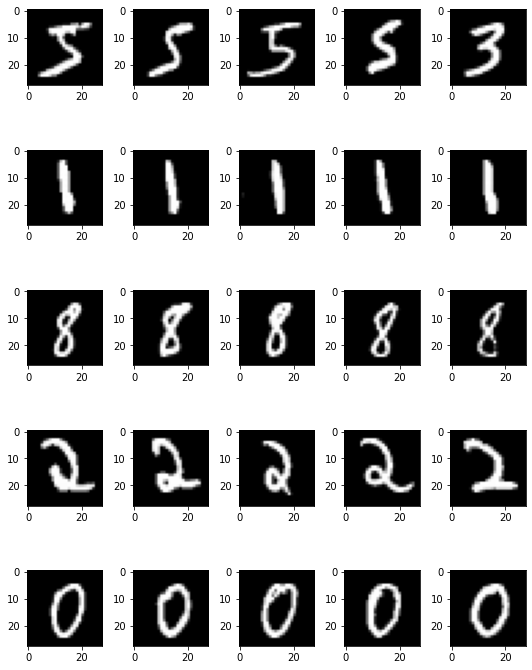

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

samples = [0, 200, 300, 400, 1000] # picking some sample digits
fig, axes = plt.subplots(5, 5, figsize=(7.5,10)) # creating a plot grid
for i in range(5):
    sample_digit = digits[samples[i]] # get the corresponding vector for the sample digit
    sq_distances = np.sum((digits-sample_digit)**2, axis=1) # calculate the Eucleadian distance, used broadcasting
    top_5 = np.argsort(sq_distances)[:5] # sort and get the top 5 nearest (lowest distance)
    for j in range(5):
        ax = axes[i, j]
        ax.imshow(digits[top_5[j]].reshape((28,28)), cmap='gray') # show the image
plt.tight_layout()
plt.show()

# Shuffle Samples

In [5]:
np.random.seed(2024)
np.random.shuffle(data)

# Split it to 80% for training and 20% for validation

In [6]:
trainSplit = int(data.shape[0]*.8)
training, test = data[:trainSplit,:], data[trainSplit:,:]
print(training.shape)
print(test.shape)

(48000, 785)
(12000, 785)


# Separate labels from input data for both training and validation data

In [7]:
print(data[:,0]) # the first column is the label
trainingDigits = training[:, 1:] # keep everything except the first label
trainingResponse = training[:,0] # vector of training response variables
print(trainingResponse)
print(trainingDigits.shape)
print(trainingResponse.shape)

[0. 2. 1. ... 2. 7. 0.]
[0. 2. 1. ... 4. 6. 1.]
(48000, 784)
(48000,)


In [8]:
testDigits = test[:, 1:] # keep everything except the first label
testResponse = test[:,0] # vector of test response variables
print(testDigits.shape)
print(testResponse.shape)

(12000, 784)
(12000,)


# For each K from 1 to 25 (create a loop), instantiate an object from “KNNClassifier” with that number of neighbors.

In [ ]:
knn = KNNClassifier(5) # 10

In [99]:
# start by manually selecting a sample by index
index = 700 #100
targetResponse = trainingResponse[index]
print(targetResponse)
print(type(targetResponse))

3.0
<class 'numpy.float64'>


In [124]:
knnPredictions = []
for i in range(1,2):
  knn = KNNClassifier(i) # instantiate classifier object for each k
  fit = knn.fit(trainingDigits,trainingResponse) # pass classifier the training data and the target vector
  predict = knn.predict(testDigits)
  knnPredictions.append(predict)

print("knn Predictions", knnPredictions)
  # # iterate over the k neighbors to check for successful classification
  # match  = [] # stores boolean based on correct classification of neighbor
  # for j in range(fit.size):
  #   # print("this is fit[j]",fit[j])
  #   # print("this is the response from fit[j]", trainingResponse[fit[j]])
  #   match.append(trainingResponse[fit[j]]==targetResponse) # checks the match
  # matchSums.append(sum(match)/len(match)) # sums up all of the matches and divides by each respective k

  
# # get optimal k by finding the maximum success rate
# optimalK = np.argsort(matchSums)
# print(optimalK)
# print(matchSums)


training data loaded


KeyboardInterrupt: ignored

# Feed training data using “fit” method

In [ ]:
fit = knn.fit(trainingDigits,trainingResponse[200] )
print(fit)
for i in range(fit.size):
  print(trainingResponse[i])

X is [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] and y is 9.0
[31835 38794  8156 12241 32745]
6.0
5.0
2.0
5.0
6.0


# Predict the labels for validation data using ‘predict’ method

# Compare the predicted labels with the true labels and calculate accuracy: